# Data Science in Python

Python is a great general purpose, high-level programming language and one of its highlights is its ability to use well-developed packages for data science. With simple to learn syntax rules and highly developed support forums Python makes it easier for you to prepare your data prior to feeding it into your data science applications. 

The main learning outcomes of this session are:
- **Importing data and using dataframes**: Importing data using the `pandas` library and manipulating data efficiently 
- **Basic exploratory data anlysis using Python**: Learning the basics of looking at our data and cleaning it up prior to drawing any conclusions and trying to build analysis - comparing imputation techniques
- **Application of data analysis to an example dataset**: Examining all of the above on a toy dataset that has been created for the purpose of this workshop

This session particularly will focus on using the following libraries in the data science context:
- **Numpy**: A library with a large collection of high-level mathematical functions, and support for large, multidimensional arrays/matrices. In particular it works very well in tandem with pandas. [numpy page](https://numpy.org/)
- **Pandas**: A library particularly developed for data manipulation and analysis, offering efficient data structures and operations. In particular it works very well in tandem with numpy. [pandas page](https://pandas.pydata.org/)
- **Scikit-Learn**: A library featuring various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN. [scikit-learn page](https://scikit-learn.org/stable/)

The key themes overlaying all of the above content are:
- **Doing things efficiently**: Efficiency in Python is not just about writing code quickly but also about optimising it for performance and resource consumption. This workshop aims to show you how to do things correctly the first time.
- **Learning best practices**: Python has a set of coding standards and guidelines to ensure consistency and maintainability of code which will be reflected throughout this notebook.


In [2]:
# Install dependencies before running workshop
!pip3 install pandas
!pip3 install numpy
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install opencv-python
!pip3 install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Importing data and using dataframes

One of the great things about using `pandas` is that it enable us to easily import and manipulate data. In fact when we pair it up with `numpy` it allows us to do transformations and other manipulations of our data to allow us to do our analytics work.

In [3]:
# Import our libraries and give them aliases so they're easier to use
import pandas as pd
import numpy as np

In [4]:
finance_data = pd.read_excel('Simpsons Data.xlsx',sheet_name = 'Finance Data', index_col = 0)
hr_data = pd.read_excel('Simpsons Data.xlsx',sheet_name = 'HR Data', index_col = 0)

In [16]:
# Let's look at our finance data
finance_data

,Income,Position
Name,,
Homer Simpson,70,Plant Operator
Montgomery Burns,1843,CEO
Waylan Smithers,85,Executive Assistant
Duff Man,5,Marketing Head
"Lenford ""Lenny"" Leonard",65,Plant Operator
Barney Gumble,0,Unknown
Carl Carlson,66,Plant Operator


In [15]:
# Let's look at our HR data
hr_data

,Age,Comments
Name,,
Homer Simpson,47,On performance watch - suspected uranium theft
Montgomery Burns,78,Stock options approved by board
Waylan Smithers,40,NaN
Duff Man,33,NaN
"Lenford ""Lenny"" Leonard",36,NaN
Barney Gumble,28,Fired?
Carl Carlson,35,NaN


## Selecting data from dataframes
One very important thing to understand about dataframes is that they operate differently from lists or arrays. Dataframes have indexes which is how each row is mapped. Here we have used the employee names as the index, but if we don't specify anything, the default index `pandas` creates is using integers.

When selecting data, we can either address columns by name, or by their row/column index to select columns, rows, or their intersection.

To **select a column**, we can either address it by name or through its column index.
- Addressing by name is done through `data_frame["column_name"]`
 - Or for a span of columns `data_frame.loc[:, "start_column":"end_column"]`
- Addressing by column index is done through `data_frame.iloc[:, column_index_number]` 

To **select an entire row**, we can either directly address them using the index, or we can select them by setting a criteria for another column and extracting those rows.
- Addressing by index row is done through `data_frame.iloc[data_frame.index==index_row]`
- Addressing by condition is done through a similar method `data_frame.loc[boolean condition]` with the boolean condition being in relation to the original dataframe

In [7]:
# Select the Age column from HR data
print(hr_data["Age"])

Name
Homer Simpson              47
Montgomery Burns           78
Waylan Smithers            40
Duff Man                   33
Lenford "Lenny" Leonard    36
Barney Gumble              28
Carl Carlson               35
Name: Age, dtype: int64


In [8]:
# Or doing the same thing through column index
print(hr_data.iloc[:,0])

Name
Homer Simpson              47
Montgomery Burns           78
Waylan Smithers            40
Duff Man                   33
Lenford "Lenny" Leonard    36
Barney Gumble              28
Carl Carlson               35
Name: Age, dtype: int64


In [43]:
# Checking our boolean condition for row selection. We want to check rows where age <40 is True or False
hr_data["Age"]<40

Name
Homer Simpson              False
Montgomery Burns           False
Waylan Smithers            False
Duff Man                    True
Lenford "Lenny" Leonard     True
Barney Gumble               True
Carl Carlson                True
Name: Age, dtype: bool

In [9]:
# Select the rows of HR data where they are <40
hr_data.loc[hr_data["Age"]<40]

,Age,Comments
Name,,
Duff Man,33,NaN
"Lenford ""Lenny"" Leonard",36,NaN
Barney Gumble,28,Fired?
Carl Carlson,35,NaN


In [10]:
# Select the row where the index is "Homer Simpson"
finance_data.iloc[finance_data.index=="Homer Simpson"]

,Income,Position
Name,,
Homer Simpson,70,Plant Operator


In [ ]:
# Exercise: Select all rows where income is >= $65,000 per year
'''Your Code Here'''

In [47]:
# Extension: Return the age of all employees whose income is < $70,000 per year
'''Your Code Here'''

'Your Code Here'

## Merging and adding data to dataframes
We can also **concatenate dataframes** by using their index as a matching key to merge data, or add columns and rows to existing dataframes.
- To merge dataframes we use `pd.concat(list_of_dfs)`
 - We can also specify the `axis` argument to choose whether we join horizontally (`axis = 1`) or vertically stack (`axis = 0` - the default)
 - Note where the indexes match they will automatically merge. Where we want to define a new index, we can create this by specifying `ignore_index=True` 
- To add to dataframes **efficiently** we generally want to define the data we want to add as a dictionary, which we convert to a dataframe and then concatenate using the above method
 - To add rows we can use `pd.DataFrame.from_dict(new_dict, orient='index', columns = df_headers_list)`
 - To add columns we `pd.DataFrame.from_dict(new_dict)` where the key of our dictionary is the column name


In [17]:
# Merge our data into a single dataframe
employee_df = pd.concat([finance_data, hr_data], axis = 1)

In [18]:
employee_df # check our concat has worked as expected

,Income,Position,Age,Comments
Name,,,,
Homer Simpson,70,Plant Operator,47,On performance watch - suspected uranium theft
Montgomery Burns,1843,CEO,78,Stock options approved by board
Waylan Smithers,85,Executive Assistant,40,NaN
Duff Man,5,Marketing Head,33,NaN
"Lenford ""Lenny"" Leonard",65,Plant Operator,36,NaN
Barney Gumble,0,Unknown,28,Fired?
Carl Carlson,66,Plant Operator,35,NaN


We have 2 new employees who are joining the company and need their details added to the `employee` dataframe above.

In [19]:
# Generate a list of our headers to see what we need to fill out
headers = employee_df.columns.tolist() # ['Income', 'Position', 'Age', 'Comments']
headers

['Income', 'Position', 'Age', 'Comments']

In [20]:
# Generate our new employee data as a dictionary
new_employees = {"Hans Moleman": [10, "HR", 100, "Has cataracts"],\
                 "Edna Krabappel" : [32.5, "Knowledge Management", 32, "Smoking risk"]}

new_employees_df = pd.DataFrame.from_dict(new_employees, orient='index', columns=headers)
new_employees_df

,Income,Position,Age,Comments
Hans Moleman,10.0,HR,100,Has cataracts
Edna Krabappel,32.5,Knowledge Management,32,Smoking risk


In [21]:
# Exercise - Add the new employees to the original employee dataframe
employee_df = pd.concat('''Your Code Here''')

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "str"

In [59]:
employee_df

,Income,Position,Age,Comments
Name,,,,
Homer Simpson,70,Plant Operator,47,On performance watch - suspected uranium theft
Montgomery Burns,1843,CEO,78,Stock options approved by board
Waylan Smithers,85,Executive Assistant,40,NaN
Duff Man,5,Marketing Head,33,NaN
"Lenford ""Lenny"" Leonard",65,Plant Operator,36,NaN
Barney Gumble,0,Unknown,28,Fired?
Carl Carlson,66,Plant Operator,35,NaN


## Modifying data in dataframes
Selecting data from a dataframe  generates what is known as a **slice** of the dataframe which is a link to the original data.  This is fine if we just want to view what we are working with, but if we ever want to modify data, we need to generate a copy of a slice to work with using `data_frame_slice.copy()`.

We can do normal mathematical operations on these columns using numpy, or just using normal mathematical operators, and replace the original data with our transformed data.

In [22]:
# Income data is in thousands, let's convert it to the correct raw number
employee_df["Income"] = employee_df["Income"].copy()*1000

In [23]:
# Exercise: We've been given employee gender, try adding this as a column to employee_df 
employee_gender = {"Gender" : ["M","M","M","M","M","M","M","M","F"]}

# Create dataframe of employee gender
'''Your Code Here'''

# Concatenate dfs
'''Your Code Here'''

'Your Code Here'

In [ ]:
# Exercise - Add a new column to the dataframe with the height of each employee in cm (hint 1 inch = 2.54 cm)
employee_height = {"Height" : [68,60,62,75,65,70,67,50,60]}

# Create dataframe of height
'''Your Code Here'''

# Transform height to cm
'''Your Code Here'''

# Concatenate dfs
'''Your Code Here'''

In [ ]:
employee_df

# Basic Exploratory Data Analysis

Exploratory data analysis (EDA) is one of the other key tools that we have in our toolkit as data scientists. EDA involves 2 main actions:
1. Understanding how good (or more usually how bad) your data is
     - Understanding what data means
     - Understanding where data is missing and whether it's important
     - Is there enough data to draw meaningful conclusions?
     - Are there outliers, is this important?

2. Where possible, modifying data to make analysis more meaningful
     - Filling in blanks where appropriate, using the best method
     - Normalising data to ensure uniform variance
     - Converting data to the appropriate type
 
The easiest way to start doing this is to use an example, as this shows how easy it is to explore a dataset, but also how easy it is to fix our data issues. Let's take a look at two datasets which come built into scikit-learn. The diabetes dataset has 442 entries, each with 10 features. The California Housing dataset is much larger with 20,640 entries and 8 features. It needs to be downloaded. We will only use the first 400 entries for the sake of speeding up the calculations but feel free to use the whole dataset.

In [10]:
from sklearn.datasets import fetch_california_housing # import a toy dataset from sklearn
from sklearn.datasets import load_diabetes

In [11]:
diabetes = load_diabetes(as_frame=True)
diabetes_df = diabetes.frame

In [12]:
diabetes_df.head().round(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.03808,0.05068,0.06170,0.02187,-0.04422,-0.03482,-0.04340,-0.00259,0.01991,-0.01765,151.0
1,-0.00188,-0.04464,-0.05147,-0.02633,-0.00845,-0.01916,0.07441,-0.03949,-0.06833,-0.09220,75.0
2,0.08530,0.05068,0.04445,-0.00567,-0.04560,-0.03419,-0.03236,-0.00259,0.00286,-0.02593,141.0
3,-0.08906,-0.04464,-0.01160,-0.03666,0.01219,0.02499,-0.03604,0.03431,0.02269,-0.00936,206.0
4,0.00538,-0.04464,-0.03638,0.02187,0.00393,0.01560,0.00814,-0.00259,-0.03199,-0.04664,135.0


In [13]:
diabetes_df.describe().round(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


In [ ]:
# Load the california housing dataset 
'''Your Code Here'''

# Convert the data to a DataFrame
'''Your Code Here'''

In [ ]:
# Examine the first 5 rows of the DataFrame and round to 3 decimal places
'''Your Code Here'''

In [ ]:
# Retrieve descriptive statistics and round to 3 decimal places
'''Your Code Here'''

## Add missing values to the datasets

In [19]:
rng = np.random.RandomState(42) # Choose a seed so that we all get similar results

In [20]:
X_diabetes, y_diabetes = load_diabetes(return_X_y=True) # Return X and y data as 2 arguments to unpack instead of 1

X_california, y_california = fetch_california_housing(return_X_y=True)
X_california = X_california[:400] # Take first 400 values of California house data
y_california = y_california[:400]

In [21]:
# A function to add in missing values, with a default drop rate of 75%
def add_missing_values(X_full, y_full, missing_rate = 0.75):
    n_samples, n_features = X_full.shape

    n_missing_samples = int(n_samples * missing_rate) # Calc the number of samples which we will remove

    missing_samples = np.zeros(n_samples, dtype=bool) # Pre-allocate matrix for speed
    missing_samples[:n_missing_samples] = True # Select how many samples to drop

    rng.shuffle(missing_samples) # Randomly shuffle the truth mask for the samples
    missing_features = rng.randint(0, n_features, n_missing_samples) # Select which feature is dropped at random for each sample
    X_missing = X_full.copy()
    X_missing[missing_samples, missing_features] = np.nan # Drop the selected features and replace with NaN
    y_missing = y_full.copy()

    return X_missing, y_missing

In [22]:
# Apply the function to the california housing and diabetes datasets
X_miss_california, y_miss_california = add_missing_values(X_california, y_california)
X_miss_diabetes, y_miss_diabetes = add_missing_values(X_diabetes, y_diabetes)

In [23]:
X_miss_california

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      ,           nan],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [          nan,   50.        ,    5.33480176, ...,    2.30396476,
          37.88      , -122.29      ],
       [   5.1675    ,   52.        ,    6.39869281, ...,    2.44444444,
          37.89      , -122.29      ],
       [   5.1696    ,   52.        ,    6.11590296, ...,    2.70619946,
                  nan, -122.29      ]])

## Comparing imputation techniques across datasets

There are a lot of ways to impute missing datasets, each which have their own benefits and downsides. As data scientists, we need to know which one works in what circumstance. Let's compare techniques using scikit-learn's inbuilt imputer function.

In [24]:
rng = np.random.RandomState(0)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [26]:
# Set up for k-fold cross-validation
n_splits = 4
regressor = RandomForestRegressor(random_state=0)

###  Calculating the performance of imputation using cross validation
When we are doing comparison we need to figure out how it performs. One method to do this with small datasets is using cross validation scores.

Cross validation scores are calculated by splitting the training set into k smaller sets. The following procedure is followed for each of the k “folds”:
- A model is trained using `k-1` of the folds as training data;
- The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop giving an estiamte of accuracy.
![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [27]:
# Function to evaluate the performance of an imputer
def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=n_splits
    )
    return impute_scores

In [28]:
x_labels = [] # Labels for when we want to graph our results

# Pre-allocate our MSE and standard deviation result matrices for each dataset
mses_diabetes = np.zeros(4)
stds_diabetes = np.zeros(4)
mses_california = np.zeros(4)
stds_california = np.zeros(4)

## Reference: Calculate cross validation loss with the full dataset

The function below evaluates the performance of a regression model (represented by regressor) on the full datasets for the diabetes and california housing datasets, and is for reference only.

In [29]:
def get_full_score(X_full, y_full):
    full_scores = cross_val_score(
        regressor, X_full, y_full, scoring="neg_mean_squared_error", cv=n_splits
    )
    return abs(full_scores.mean()), abs(full_scores.std())


mses_california[0], stds_california[0] = get_full_score(X_california, y_california)
mses_diabetes[0], stds_diabetes[0] = get_full_score(X_diabetes, y_diabetes)
x_labels.append("Full data")

## Replacing all missing values with 0s
One option is to replace all our values with 0s. Given the average for most of the featues in our dataset is 0, this may not be a bad option. However, because this is synthetically modifying data, we are changing the distribution of the data. Where the mean is close to 0 this may not be as big an issue, but where this isn't the case it can have **big** impacts on our data distrubtion and turn our data into garbage.

In [30]:
def get_impute_zero_score(X_missing, y_missing):

    imputer = SimpleImputer(
        missing_values=np.nan, add_indicator=True, strategy="constant", fill_value=0
    )
    zero_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return abs(zero_impute_scores.mean()), abs(zero_impute_scores.std())


mses_california[1], stds_california[1] = get_impute_zero_score(
    X_miss_california, y_miss_california
)
mses_diabetes[1], stds_diabetes[1] = get_impute_zero_score(
    X_miss_diabetes, y_miss_diabetes
)

x_labels.append("Zero imputation")

## Imputing missing values using k-Nearest Neighbours (kNN)

Given we are an AI practice, why can't we use AI to fill in the data! But in all seriousness, one method which is a good way to retain the data distribution and repair our dataset is to impute data, based on the k nearest neighbours of each datapoint. 

This is done usually by calculating the total euclidean distance between each point based on their features and then minimising that for the k nearest points for the missing datapoint. Generally, this is rarely an issue, **except for where we have a _lot_ of data due to computational expense of kNN**.

In [31]:
def get_impute_knn_score(X_missing, y_missing):
    
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return abs(knn_impute_scores.mean()), abs(knn_impute_scores.std())


mses_california[2], stds_california[2] = get_impute_knn_score(
    X_miss_california, y_miss_california
)
mses_diabetes[2], stds_diabetes[2] = get_impute_knn_score(
    X_miss_diabetes, y_miss_diabetes
)
x_labels.append("KNN Imputation")

## Imputing missing values using the mean

Another option is to just use the mean. Ideally this will just make the distribution of data narrower, however, generally this is a better option than replacing with 0s. 

Where this is not suited is **where there are a lot of outliers** in which case using the median may be a better option. Given this is not the case with either dataset, we should see okay performance from this data

In [32]:
def get_impute_mean(X_missing, y_missing):
    
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return abs(mean_impute_scores.mean()), abs(mean_impute_scores.std())


mses_california[3], stds_california[3] = get_impute_mean(
    X_miss_california, y_miss_california
)
mses_diabetes[3], stds_diabetes[3] = get_impute_mean(X_miss_diabetes, y_miss_diabetes)
x_labels.append("Mean Imputation")

## Plotting to compare results

Let's look at the results in a visual. Fortunately matplotlib provides easy to use visualisations to do this. Note that because we are evaluating these results using cross validation scores, we won't see a 0 MSE loss for even the original dataset. However, generally the lower the better.

In the Diabetes dataset, kNN is the best performer. However, in the California Housing dataset, Zero imputation has the lowest MSE score. This might indicate that the missing values are not informative and have no significant impact on the analysis. The mean imputation technique also performs better than kNN which may indicate that we may not have used enough datapoints with our California dataset, and also reminds us to be aware of the impact of sample size.

In [33]:
import matplotlib.pyplot as plt

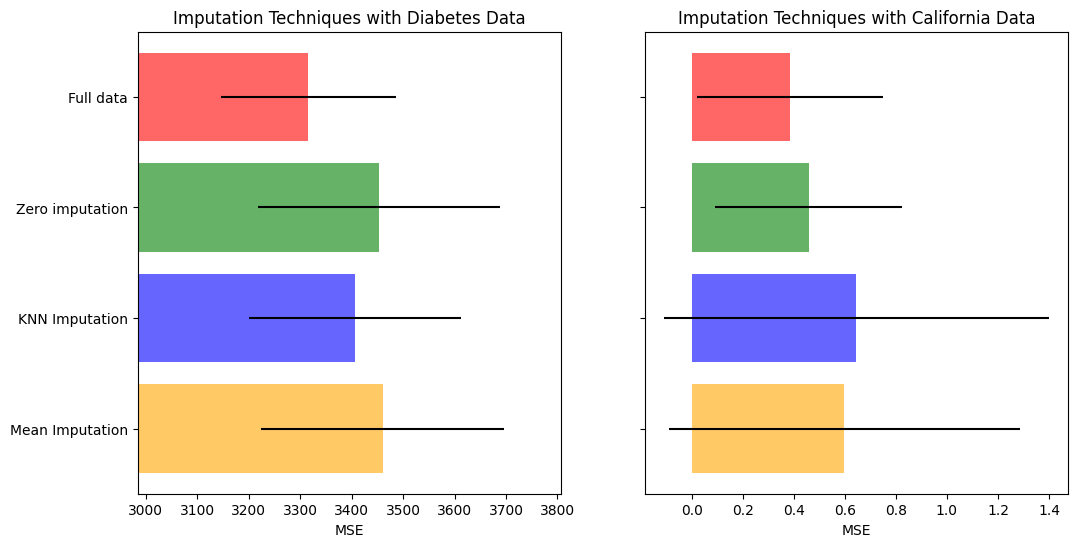

In [34]:
n_bars = len(mses_diabetes)
xval = np.arange(n_bars)

colors = ["r", "g", "b", "orange", "black"]

# plot diabetes results
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(
        j,
        mses_diabetes[j],
        xerr=stds_diabetes[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax1.set_title("Imputation Techniques with Diabetes Data")
ax1.set_xlim(left=np.min(mses_diabetes) * 0.9, right=np.max(mses_diabetes) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel("MSE")
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)

# plot california dataset results
ax2 = plt.subplot(122)
for j in xval:
    ax2.barh(
        j,
        mses_california[j],
        xerr=stds_california[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax2.set_title("Imputation Techniques with California Data")
ax2.set_yticks(xval)
ax2.set_xlabel("MSE")
ax2.invert_yaxis()
ax2.set_yticklabels([""] * n_bars)

plt.show()

# Using Numpy

NumPy is an incredibly powerful tool to do numerical manipulation and modification within Python. Because most of the code base is written in C it is also (usually) a lot faster at doing certain operations than the inbuilt Python functions.

Much of this speed gain also comes from using NumPy arrays instead of Python lists. NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized even further.

To explore the functionality of `NumPy` we'll be going through an exercise of how to use it to do:
- Basic array manipulation - inducing, slicing, slicing based on a boolean condition
- Basic linear algebra with arrays - multiplication by a constant, dot product, matrix multiplication
- Data types and casting

## Basic array manipulation
One of the advantages of NumPy is that it is very good at allowing us to do array manipulation. This is particularly useful in ML applications, but it also has use where we are just dealing with normal data.

In [50]:
# Let's start with how to make an array
x = np.array([[[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],\
              [[13 , 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])

In [51]:
print("The shape of x is:")
print(x.shape) # note that this is a 3 dimensional array
print(x)

The shape of x is:
(2, 3, 4)
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


In [52]:
# We can turn this into a 1-dimensional array by using the .flatten() method
# This is useful for when we are taking our final layer of a neural net and feeding it into a softmax layer
print(x.flatten())
print("The shape of flattened x is:")
print(x.flatten().shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
The shape of flattened x is:
(24,)


In [53]:
x

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [54]:
toy_data = np.arange(6) # generate an array that has 6 elements, starting from 0 and increasing in increments of 1
toy_data

array([0, 1, 2, 3, 4, 5])

### Special Numpy Thing # 1 - Broadcasting
One of the things that makes numpy great as a mathematical library is its ability to do very efficient array and matrix operations. One way that it can do this is through a special function called broadcasting, where you can do large scale mathematical operations using NumPy's internal systems to to things faster than if you were to do it via lists.

Let's check it out below.

In [56]:
# Broadcasting via addition - add dimensions with each column having a different operation on it
modified_data = toy_data[:,np.newaxis] + np.array([1,2,3])
modified_data

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 8]])

In [57]:
# Broadcasting via multiplication/division - note inner dimensions must match
working_multipliers = np.array([0.5,-1.2,1])
mismatch_multipliers = np.array([0.5,-1.2,1,0])

print("Working Multiplication:")
print(modified_data * working_multipliers)

modified_data * mismatch_multipliers # This does not work because NumPy cannot map the 4 dimensions onto a 3 column matrix

Working Multiplication:
[[ 0.5 -2.4  3. ]
 [ 1.  -3.6  4. ]
 [ 1.5 -4.8  5. ]
 [ 2.  -6.   6. ]
 [ 2.5 -7.2  7. ]
 [ 3.  -8.4  8. ]]


ValueError: operands could not be broadcast together with shapes (6,3) (4,) 

In [18]:
# Exercise - will mismatch multipliers work with our original matrix, x? 
# Try out below, and try to explain what happens
'''Your Code Here'''

array([[[  0.5,  -2.4,   3. ,   0. ],
        [  2.5,  -7.2,   7. ,   0. ],
        [  4.5, -12. ,  11. ,   0. ]],

       [[  6.5, -16.8,  15. ,   0. ],
        [  8.5, -21.6,  19. ,   0. ],
        [ 10.5, -26.4,  23. ,   0. ]]])

### Putting it all together in an example: Working out customer satisfaction 
One of the key reasons NumPy is the bread and butter of many data science applications in Python is because it's _really_ good at doing matrix operations. Once we realise this we can do things, we can exploit the way that we do our data preparation and exploration to get to outcomes very quickly.

Some of the key functions in NumPy are:
- Matrix multiplication using `.matmul()`
- Getting the dot product of two matrixes by the dot product using `.dot()`
- Getting a vector cross product using `.cross()`

To explore this we are going to go through an example of dealing with user experience data from feedback froms from our hypothetical website. Let us assume we get **100 survey** results from respondents, each who have answered **10 questions**. We'll be using the `.dot()` function for this.

In [78]:
survey_data = np.random.random(1000) # generate random samples
print("The shape of our original data is: " + str(survey_data.shape))

The shape of our original data is: (1000,)


In [79]:
survey_data = survey_data.reshape((100,10)) # reshape our data so that each respondent has their own array
print("The shape of our modified data is: " + str(survey_data.shape))

The shape of our modified data is: (100, 10)


In [80]:
survey_data

array([[1.08772628e-01, 3.77983382e-01, 8.74913716e-01, 8.76807649e-01,
        7.34450270e-01, 2.25470118e-01, 4.12256019e-01, 1.34324059e-01,
        4.66641242e-01, 3.67713794e-01],
       [1.35439547e-01, 6.22332764e-01, 3.03786372e-01, 8.78735438e-01,
        2.71043470e-01, 9.19194886e-01, 2.41195794e-01, 4.09802466e-01,
        8.03289231e-01, 3.32240679e-01],
       [1.69740916e-01, 9.05334884e-01, 3.92703469e-01, 2.84226470e-01,
        6.11713207e-01, 6.91199956e-01, 6.93595446e-01, 8.54821593e-01,
        2.95174487e-01, 5.80253624e-01],
       [7.86651054e-01, 3.34397622e-01, 2.76327825e-01, 3.28547819e-01,
        2.51109567e-01, 3.32489267e-01, 3.84795464e-01, 1.76390854e-01,
        6.71183110e-02, 8.03585871e-01],
       [8.13215936e-01, 2.84215062e-01, 8.44869216e-01, 2.27962491e-01,
        9.30515153e-01, 6.22592072e-01, 3.99603163e-01, 1.51196038e-01,
        4.40590188e-01, 5.48405318e-01],
       [1.63703855e-01, 7.04621492e-01, 5.62466759e-01, 2.73610921e-01,
   

In [81]:
# Lets normalise our data so that we can do fair data analysis
survey_data = (survey_data - survey_data.min())/(survey_data.max() - survey_data.min())

In [82]:
survey_data # Compare to the above non-normalised data

array([[0.10842384, 0.37856429, 0.87721073, 0.8791112 , 0.73626221,
        0.22552433, 0.41295528, 0.13406351, 0.46752832, 0.36825924],
       [0.13518285, 0.62375751, 0.30411105, 0.88104565, 0.27125507,
        0.92164482, 0.24130432, 0.41049326, 0.8053389 , 0.33266362],
       [0.16960268, 0.90773696, 0.39333521, 0.2844836 , 0.61310128,
        0.69286253, 0.69526629, 0.85704922, 0.29546942, 0.58153306],
       [0.78864326, 0.33482801, 0.27655767, 0.32895801, 0.25125233,
        0.33291306, 0.3853999 , 0.17627558, 0.06662567, 0.80563656],
       [0.81529988, 0.28447215, 0.84706248, 0.22802531, 0.93300418,
        0.62401772, 0.40025873, 0.15099375, 0.4413873 , 0.54957476],
       [0.16354477, 0.70633042, 0.56368476, 0.27383139, 0.81517272,
        0.16661208, 0.32635538, 0.48745913, 0.69486484, 0.1393915 ],
       [0.24583391, 0.24580275, 0.97375633, 0.81130086, 0.89469616,
        0.64184253, 0.69032536, 0.41001702, 0.20922676, 0.03764413],
       [0.85343786, 0.96251453, 0.8239044

Now that we have our data in a useful form that we actually do things with (and we can compare the results of each survey now that they are normalised), we can start drawing insights from our data.

The client's marketing team has come to us and said that for their next marketing campaign they're want to focus on the UX aspects of their landing page, which was surveyed in questions 1, 2, 5 and 7 out of the 10 questions. They want a baseline result of average customer satisfaction across the cohort to measure performance against.



In [83]:
# Step 1: Create a boolean array to only select the values we want from our survey
marketing_value = np.array([1,1,0,0,1,0,1,0,0,0],dtype=bool) # Select the questions we are interested in
marketing_value

array([ True,  True, False, False,  True, False,  True, False, False,
       False])

In [84]:
# Step 2: Apply our boolean mask to our survey data to get our average baseline score for each customer
marketing_outcomes = np.dot(survey_data,marketing_value) # this takes the dot product out [100,10] x [10,1] matrix to give a [100 x 1] output of raw results

print(marketing_outcomes.shape) # Confirm dimensionality is correct
print(marketing_outcomes) # Look at the output - what does each number represent here?

(100,)
[1.63620562 1.27149975 2.38570721 1.7601235  2.43303495 2.01140329
 2.07665818 3.44921771 1.19467947 2.62518578 2.2382133  2.2596265
 2.01205184 2.42685546 1.86188519 1.66315169 2.08375272 2.06857087
 1.60835846 2.6261155  2.2331762  1.96572579 2.62739749 2.16813289
 2.13375231 3.24420436 1.50142496 0.83238627 2.10503392 2.86120251
 2.14659675 1.66244762 2.24808866 2.48314197 1.17907203 1.63684266
 2.9392506  2.4116193  3.14050799 2.09393429 1.03190066 1.54568264
 1.35581637 1.68955063 2.29985026 1.30529566 2.05332783 1.7826614
 2.4791589  2.80442544 2.86539035 0.948703   1.21547223 2.60667767
 3.12167275 2.23481549 2.72755262 1.80694155 1.40947021 1.55655109
 1.83163954 2.25917673 1.80052654 2.01254293 2.22273288 0.90529423
 3.00473195 1.4441928  1.89991608 2.07295481 1.23328228 1.9362111
 1.96597284 1.83206754 2.34872374 1.27926119 2.4305712  2.64764261
 3.06960909 1.37313897 1.95441989 1.95289741 2.01489786 2.56542325
 2.92676696 1.75838862 3.23783349 1.084284   1.87100417 2.

In [101]:
# Step 3: Get average score and scale to be a %
sum(marketing_value)
marketing_outcomes_scaled = (marketing_outcomes / sum(marketing_value)) * 100
marketing_outcomes_scaled

array([40.90514049, 31.78749372, 59.6426802 , 44.00308739, 60.82587371,
       50.28508216, 51.91645458, 86.23044263, 29.86698672, 65.62964445,
       55.95533256, 56.49066245, 50.30129596, 60.67138646, 46.54712979,
       41.57879236, 52.0938181 , 51.71427178, 40.20896144, 65.65288761,
       55.82940504, 49.14314481, 65.68493723, 54.20332224, 53.34380768,
       81.10510893, 37.5356239 , 20.80965665, 52.62584798, 71.5300627 ,
       53.66491863, 41.56119049, 56.2022164 , 62.07854924, 29.47680063,
       40.92106648, 73.48126505, 60.29048241, 78.51269984, 52.34835716,
       25.79751639, 38.64206588, 33.89540928, 42.23876574, 57.49625651,
       32.63239152, 51.33319579, 44.56653509, 61.97897244, 70.11063594,
       71.63475887, 23.71757498, 30.38680574, 65.16694179, 78.04181873,
       55.87038723, 68.18881539, 45.17353868, 35.23675523, 38.91377727,
       45.79098853, 56.47941814, 45.01316354, 50.31357332, 55.56832211,
       22.63235583, 75.11829876, 36.10482008, 47.49790211, 51.82

In [87]:
# Step 4: Get the average customer satisfaction for the marketing team
print(f"Average Marketing Satisfaction: {np.mean(marketing_outcomes_scaled)}%")

Average Marketing Satisfaction: 51.39578489184803%


Now its your turn. 

The client's engineering team has come to us and said that for their next marketing campaign they're want to focus on the mechanics of the product. However, being engineers, they've put relative weightings on their preferencing of questions to figure out baseline performance. They think questions 1 and 10 are 3 times more important than the rest, and that questions 2, 5, and 6 are half as important.

Figure out the baseline performance for the engineering team to work with.

In [40]:
# Step 1: Create an array of weighted values for each question
engineering_value = np.array(['''Your Code Here'''])
engineering_value

array(['Your Code Here'], dtype='<U14')

In [42]:
# Step 2: Apply our boolean mask to our survey data to get our average baseline score for each customer
engineering_outcomes = '''Your Code Here'''

print(engineering_outcomes.shape) # Confirm dimensionality is correct
print(engineering_outcomes) # Each number represents baseline performance for the engineering team

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
# Step 3: Get average score and scale to be a %
sum('''Your Code Here''')
engineering_outcomes_scaled = '''Your Code Here'''

In [ ]:
# Step 5: Get the average customer satisfaction for the engineering team
'''Your Code Here'''
print(f"Average Engineering Satisfaction: {str('Your Code Here')}%")

The engineering team has engaged Deloitte to help them fix up their tech stack and the engagement team has just finished up. The engineers are suspicious of this score, and they want to test it themselves. They asked the same survey respondents to fill out surveys again and they want to see if average engineering satisfaction has actually gone up.

Using the survey data, show whether the Deloitte team did a good job or not.

In [104]:
from scipy.stats import skewnorm

In [105]:
new_survey_data = np.concatenate((np.random.normal(0.5,0.1,200),np.random.normal(0.9,0.01,800)),axis=None) 

In [52]:
# Reshape data
'''Your Code Here'''

'Your Code Here'

In [ ]:
# Normalise our data
'''Your Code Here'''

In [ ]:
# Apply the engineering mask we generated in our previous exercise
'''Your Code Here'''

In [ ]:
# Get average score and scale to be a %
'''Your Code Here'''

In [ ]:
# Get the average customer satisfcation for the engineering team
'''Your Code Here'''

## Extension - PCA and image information

Often instead of being faced with the issue of there being insufficient data for the purpose of doing analytics we are faced with the issue that we have too much information which is making our analytics slow, or is creating more noise than meaningful information.

As good data scientists we can take an intelligent approach to refining our data down into fewer elements which still capture the key variations within our dataset. One of these techniques is called Principal Component Analysis or PCA.

PCA works (via some complex mathematics that can be found [here](https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643#:~:text=Introduction,present%20in%20the%20data%20set.)) to reduce down our data into its key components. Doing this with numerical data is often hard to see so instead we're going to be doing it with an image.

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

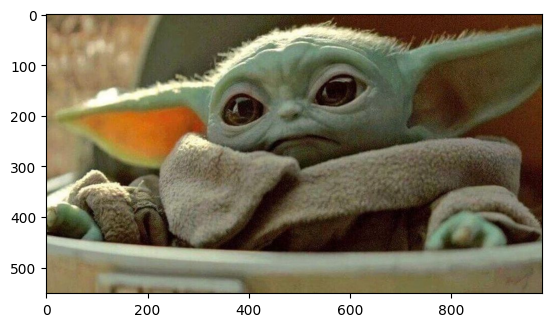

In [47]:
img = cv2.cvtColor(cv2.imread('baby-yoda.jpeg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [48]:
print("Image shape is: "+str(img.shape))

Image shape is: (551, 980, 3)


In [49]:
# Split into RGB channels
blue,green,red = cv2.split(img)

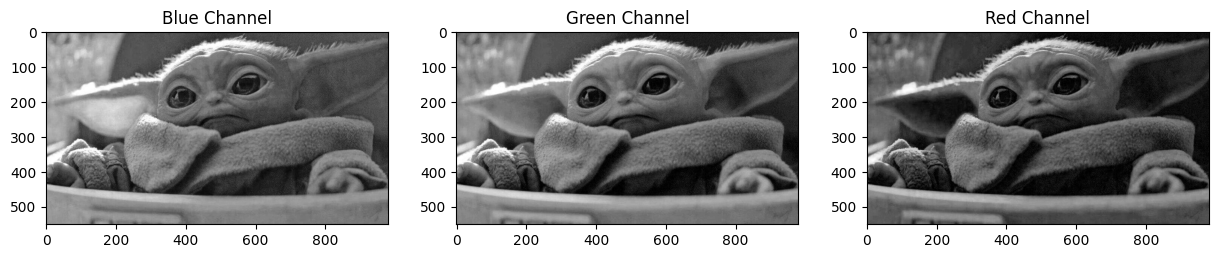

In [50]:
# Plot the images to see the different channels
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue, cmap='gray', vmin=0, vmax=255)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green, cmap='gray', vmin=0, vmax=255)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red, cmap='gray', vmin=0, vmax=255)
plt.show()

Note that the way this colour image is comprised is by having 3 chanels - red, green, and blue - for each pixel in the image, with the intensity of each colour being defined as a number between 0 anf 255. For those of us who are more mathematically minded, each of these can be thought of as a matrix, each having a dimension of 551 x 980

Let's confirm this below

In [51]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
0,133,131,131,133,135,134,131,127,136,133,...,98,92,79,87,100,91,85,85,91,99
1,131,130,130,130,131,130,128,126,132,129,...,101,101,90,93,99,89,83,85,91,99
2,129,130,130,129,128,128,128,130,127,125,...,95,98,93,92,93,87,87,89,93,99
3,129,131,132,130,128,129,132,136,124,124,...,85,87,87,86,87,87,93,94,96,98
4,127,129,130,129,127,129,133,138,124,125,...,83,83,87,87,85,87,94,95,95,94


### Time to find out how much we can compress the image

Now that we've explored our image, let's see how much information we can take out before we notice a quality hit.

In [54]:
# Normalise data first so that it varies between 0 and 1 to create consistent variance and simplify computation
df_blue = blue/255
df_green = green/255
df_red = red/255

In [55]:
# Define the first number of principal components of each image
num_comp = 50

# Apply PCA to the blue channel
pca_b = PCA(n_components=num_comp)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

# Apply PCA to the green channel
pca_g = PCA(n_components=num_comp)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

# Apply PCA to the red channel
pca_r = PCA(n_components=num_comp)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

What we have done is we have reduced our image into being defined by 50 values which can be used to recreate our image instead of the original 551 (so we've **compressed our image by over 90%!**)

In [56]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(551, 50)
(551, 50)
(551, 50)


Let's see what that actually means though. We can examine this through three steps:
- **Explained variance**: This can tell us what % of the variation of our data is captured by the number of components we've chosen
- **Histogram of variance ratio**: This shows us how important each of those components are in a visual way
- **What our image actually looks like**: The good thing with images is we can see what difference this actually has made to our image qualitatively

In [57]:
# Explained variance
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)*100}%")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)*100}%")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)*100}%")

Blue Channel : 97.81417260139189%
Green Channel: 98.21579879212136%
Red Channel  : 98.0751642710451%


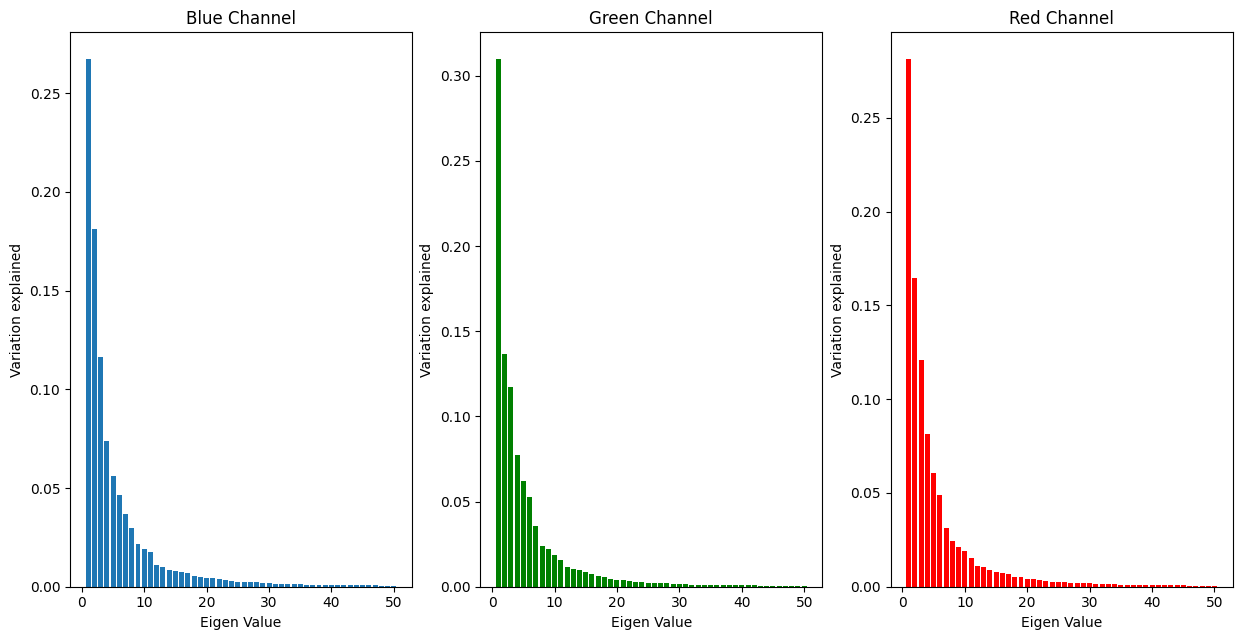

In [58]:
# Plotting a histogram of the variance for each individual component
fig = plt.figure(figsize = (15, 7.2)) 

fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_, color='green')

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_, color='red')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Undoing our PCA transformation, each channel is of shape : ((551, 980), (551, 980), (551, 980))
The size of our merged image : (551, 980, 3)


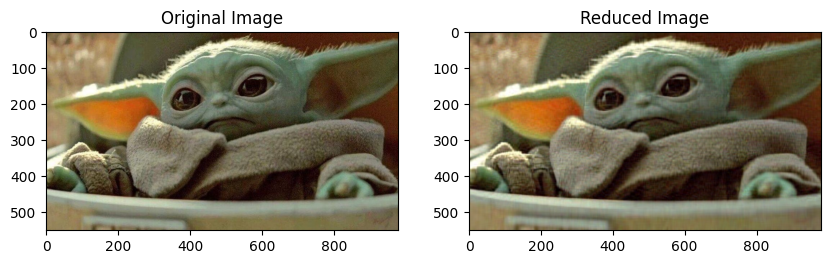

In [59]:
# Undoing our PCA transform using only the number of components selected
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(f"Undoing our PCA transformation, each channel is of shape : {b_arr.shape, g_arr.shape, r_arr.shape}")

# Merging each colour channel back into one image - the same as before
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(f"The size of our merged image : {img_reduced.shape}")

# Showing the compressed image
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

## Extension Questions

As you can see even with >90% compression our eyes can't really tell the difference between the original and the compressed image. 

Questions for your exploration:
- How many components can you reduce `num_comp` to before you can tell the difference between the compressed and original image?
- Is the information representation uniform between the channels?
- What happens if you change the number of components for each channel? Is the colour balance the same?
- Super extension question - how can we apply PCA to our city data above? What preliminary preparation would we need to do?

For an application of PCA to a real dataset, check out this [link](https://www.kaggle.com/nirajvermafcb/principal-component-analysis-explained)
